<h1>Table of Contents<span class="tocSkip"></span></h1>


# Introduction
<hr style="border:2px solid black"> </hr>


- **What?** SVM buy or sell strategy
    


# Imports
<hr style="border:2px solid black"> </hr>

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#!pip install TA-lib
#!conda install -c conda-forge ta-lib
import talib as ta

In [3]:
from talib import RSI, BBANDS, MACD

# Load data
<hr style="border:2px solid black"> </hr>

In [22]:
data = pd.read_csv('../datasource/random_stock_data.csv')
data.head(30)

,Time,Open,High,Low,Close,Volume
0,09:15:59,319.25,319.40,316.05,317.70,143354
1,09:16:59,317.70,318.20,317.70,318.00,52695
2,09:17:59,318.00,318.85,318.00,318.55,47179
3,09:18:59,318.65,319.40,318.50,319.20,44745
4,09:19:59,319.30,319.85,319.20,319.65,57892
5,09:20:59,319.60,320.40,319.60,320.25,67482
6,09:21:59,320.25,320.30,319.95,320.05,56590
7,09:22:59,320.15,320.15,319.60,319.60,52413
8,09:23:59,319.65,319.65,319.15,319.40,56305
9,09:24:59,319.50,320.05,319.45,319.70,36525


# Features engineering - indicators
<hr style="border:2px solid black"> </hr>

    
- **Relative Strength Index (RSI)** The RSI provides technical traders with signals about bullish and bearish price momentum, and it is often plotted beneath the graph of an asset’s price.
- **Bollinger Bands** are envelopes plotted at a standard deviation level above and below a simple moving average of the price. Because the distance of the bands is based on standard deviation, they adjust to volatility swings in the underlying price. 



In [24]:
# Compute Bollinger Bands
up, mid, low = BBANDS(data.Close, timeperiod=21,
                      nbdevup=2, nbdevdn=2, matype=0)

In [25]:
# Compute Relative Strength Index
rsi = RSI(data.Close, timeperiod=14)

    
- The MACD computes the difference between two Exponential Moving Averages (EMA), one longer- and one shorter-term.
- The ta-lib MACD Indicator implementation has four inputs:
    - the close price
    - fastperiod: the short-term EMA period
    - slowperiod: the long-term EMA period
    - signalperiod: the period for the EMA of the MACD itself
- It has three outputs:
    - macd is the difference between the fast EMA and slow EMA.
    - macdsignal is the EMA of the MACD value with period signalperiod
    - macdhist computes the difference between macd and macdsignal



In [26]:
macd, macdsignal, macdhist = MACD(
    data.Close, fastperiod=12, slowperiod=26, signalperiod=9)

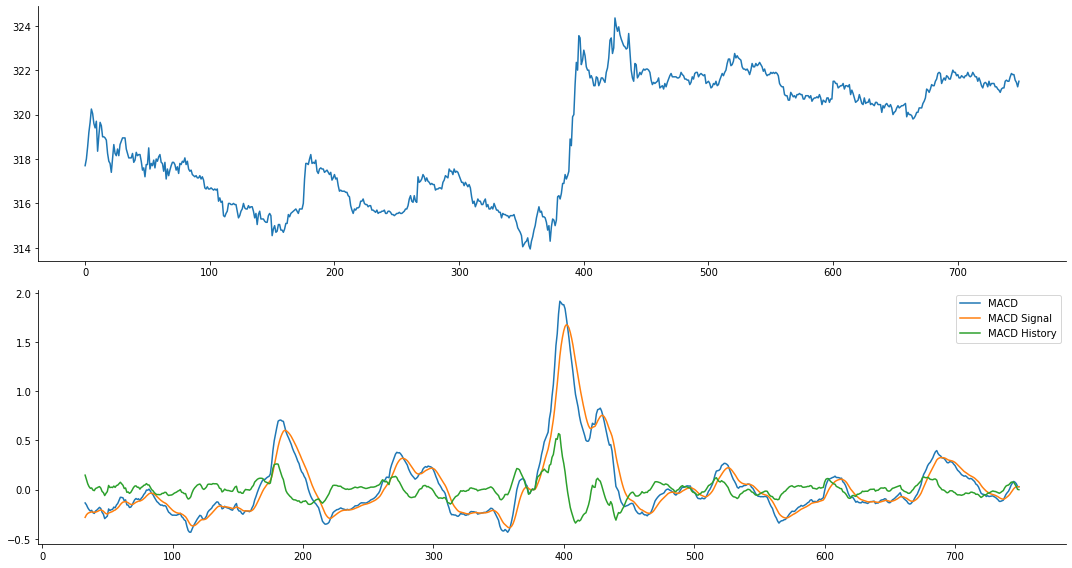

In [30]:
macd_data = pd.DataFrame({'AAPL': data.Close, 'MACD': macd,
                         'MACD Signal': macdsignal, 'MACD History': macdhist})

fig, axes = plt.subplots(nrows=2, figsize=(15, 8))
macd_data.AAPL.plot(ax=axes[0])
macd_data.drop('AAPL', axis=1).plot(ax=axes[1])
fig.tight_layout()
sns.despine()

In [31]:
data = pd.DataFrame({'AAPL': data.Close, 'BB Up': up,
                    'BB Mid': mid, 'BB down': low, 'RSI': rsi, 'MACD': macd})

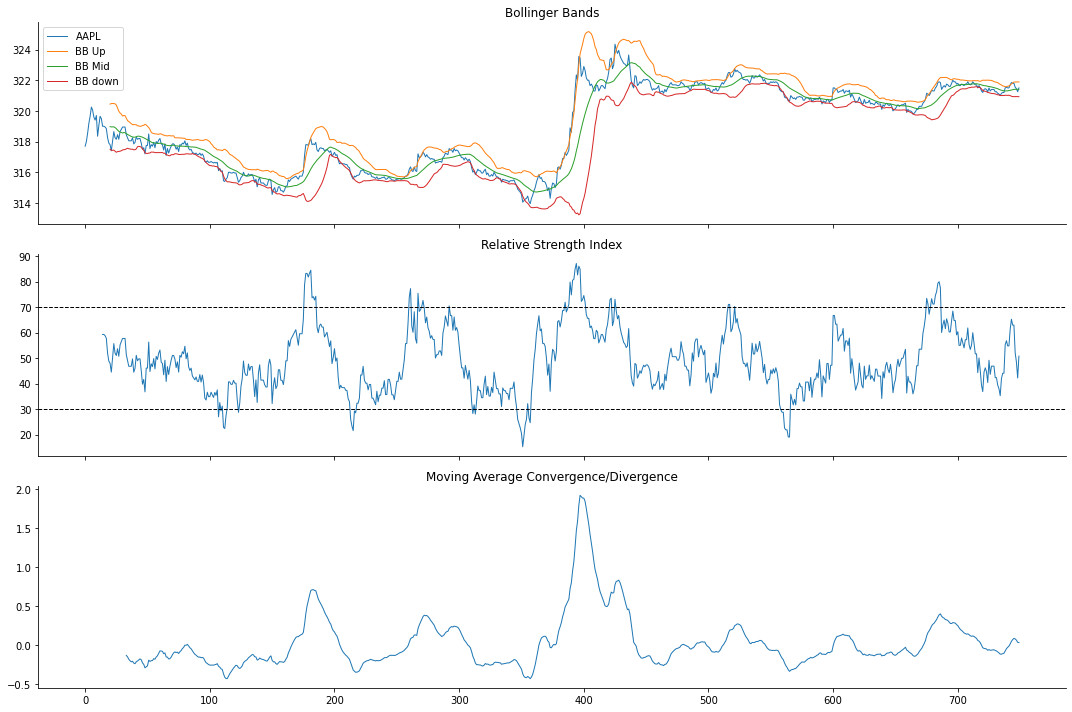

In [32]:
fig, axes= plt.subplots(nrows=3, figsize=(15, 10), sharex=True)
data.drop(['RSI', 'MACD'], axis=1).plot(ax=axes[0], lw=1, title='Bollinger Bands')
data['RSI'].plot(ax=axes[1], lw=1, title='Relative Strength Index')
axes[1].axhline(70, lw=1, ls='--', c='k')
axes[1].axhline(30, lw=1, ls='--', c='k')
data.MACD.plot(ax=axes[2], lw=1, title='Moving Average Convergence/Divergence', rot=0)
axes[2].set_xlabel('')
fig.tight_layout()
sns.despine();

# References
<hr style="border:2px solid black"> </hr>


- [Dataset](https://github.com/Datatouille/findalpha/tree/master)
- [Tutorial](https://github.com/stefan-jansen/machine-learning-for-trading/blob/main/04_alpha_factor_research/02_how_to_use_talib.ipynb)
- [https://www.fidelity.com/learning-center/trading-investing/technical-analysis/technical-indicator-guide/bollinger-bands](https://www.fidelity.com/learning-center/trading-investing/technical-analysis/technical-indicator-guide/bollinger-bands)
    
